In [1]:
%pip install pandas requests textblob wordcloud newsapi haversine
#TODO: VSCode requires the use of % instead of !. This should be changed back before submission.
#CHANGE: Added Haversine for my portion. Haversine is a package used to measure distance between coordinates.
import requests #downloads zip file from webpage
import pandas as pd
import matplotlib.pyplot as plt
import zipfile #extracts csv from zip
import io #allows treat downloaded data as a file object
import seaborn as sns
from textblob import TextBlob # will be used to analyse news from the internet
#TODO: This line does not work in VSCode, might work in Colab. Should check before submitting.
#New code from  https://github.com/mattlisiv/newsapi-python/issues/5#issuecomment-448281100
#from newsapi import NewsApiClient # will be used to extract latests articles
from newsapi.newsapi_client import NewsApiClient # will be used to extract latests articles (Replaces previous line)
from wordcloud import WordCloud # to create a word cloud of words mostly used in the articles
from haversine import haversine, Unit #to measure distance between Capital Bikeshare stations and public transit stations


Note: you may need to restart the kernel to use updated packages.


In [2]:
web = [#'https://s3.amazonaws.com/capitalbikeshare-data/2010-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2011-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2012-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2013-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2014-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2015-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2016-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/2017-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201801-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201802-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201803-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201804-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201805-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201806-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201807-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201808-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201809-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201810-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201811-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201812-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201901-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201902-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201903-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201904-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201905-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201906-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201907-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201908-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201907-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201908-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201909-capitalbikeshare-tripdata.zip',
      #'https://s3.amazonaws.com/capitalbikeshare-data/201910-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201911-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/201912-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/202001-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/202002-capitalbikeshare-tripdata.zip',
       #'https://s3.amazonaws.com/capitalbikeshare-data/202003-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202005-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202006-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202007-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202008-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202009-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202010-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202011-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202012-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202101-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202102-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202103-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202104-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202105-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202106-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202107-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202108-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202109-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202110-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202111-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202112-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202201-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202202-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202203-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202204-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202205-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202206-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202207-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202208-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202209-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202210-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202211-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202212-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202301-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202302-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202303-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202304-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202305-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202306-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202307-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202308-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202309-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202310-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202311-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202312-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202401-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202402-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202403-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202404-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202405-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202406-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202407-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202408-capitalbikeshare-tripdata.zip',
       'https://s3.amazonaws.com/capitalbikeshare-data/202409-capitalbikeshare-tripdata.zip']
#commented first files that didn't have the same set of columns
df_list = [] #adding each file as a dataframe to a list

In [3]:
#This line might take a while, you're downloading 16million lines of data
#Just let the program do it's thing and ensure you have sufficient memory available
for url in web:
    response = requests.get(url) #downloaded zip file from web
    if response.status_code == 200:
        with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file: #extracting the data
            for filename in zip_file.namelist():
                #if filename.endwith('.csv'):
                with zip_file.open(filename) as f:
                    df_1 = pd.read_csv(f, encoding='ISO-8859-1', low_memory=False) # there was some error in the columns (missmatch of value types)
                    df_list.append(df_1)
    else:
        print(f'Failed to download the ZIP file from {url} . Status code ', response.status_code)
df = pd.concat(df_list, ignore_index = True)
print(df)

                   ride_id  rideable_type               started_at  \
0         946D42AD89539210    docked_bike      2020-05-30 17:25:29   
1         CC46FAAB662B8613    docked_bike      2020-05-09 14:42:04   
2         72F00B2FB833D6ED    docked_bike      2020-05-24 17:27:19   
3         4DFBE6AED989DF35    docked_bike      2020-05-27 15:29:52   
4         1AAFE6B4331AB9DF    docked_bike      2020-05-31 14:06:03   
...                    ...            ...                      ...   
16751517  4C2859F401A89BE4  electric_bike  2024-09-16 17:23:10.553   
16751518  36C4ADE33349BF44  electric_bike  2024-09-16 08:59:39.257   
16751519  F01550D1A53887E1  electric_bike  2024-09-16 06:42:03.153   
16751520  5D3E7F1E248D4781  electric_bike  2024-09-16 14:56:28.251   
16751521  43524A3F14B4411D  electric_bike  2024-09-16 15:03:28.717   

                         ended_at  \
0             2020-05-31 18:25:22   
1             2020-05-09 15:06:33   
2             2020-05-24 17:43:51   
3          

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual,NaN,NaN,NaN
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member,NaN,NaN,NaN
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member,NaN,NaN,NaN
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual,NaN,NaN,NaN
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual,NaN,NaN,NaN


In [5]:
df['Unnamed: 0'].describe()

count                   9
unique                  1
top       #mËx.Oé TìG
freq                    9
Name: Unnamed: 0, dtype: object

In [6]:
#idk what those last columns are about, probably can just delete
df = df.drop(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'], axis=1)

In [7]:
""""
OLD CELL:
df['Date Start'] = pd.to_datetime(df['started_at'], format='ISO8601')#.dt.date
df['Time Start'] = pd.to_datetime(df['started_at'], format='ISO8601')#.dt.time
df['Year'] = pd.to_datetime(df['started_at'], format='ISO8601').dt.year
df['Date End'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.date
df['Time End'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.time
df['Year'] = pd.to_datetime(df['ended_at'], format='ISO8601').dt.year#Is this necessary?
df['Ride Length'] = pd.to_datetime(df['ended_at'], format='ISO8601') - pd.to_datetime(df['started_at'], format='ISO8601')
df['Ride Length_min'] = pd.to_timedelta(df['Ride Length']).dt.total_seconds()/60 #removed .dt.seconds from before /
df['Day Started'] = pd.to_datetime(df['started_at'], format='ISO8601').dt.day_name()#"Day Started changed from conflicting Date Start variable up top"
df.head()
"""
#Convert 'started_at' and 'ended_at' to datetime once
#CHANGE: Date Start/Date End and started_at and ended_at serve the same purpose in the program
#removed Date Start/Date End for clarity and memory savings
#CHANGE: Removed many .to_datetime conversions as started_at and ended_at are already converted to datetime
#format. these extra conversions caused bugs and unncessary memory use
df['started_at'] = pd.to_datetime(df['started_at'], format='ISO8601')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='ISO8601')

#Calculate additional columns
#TODO: Check if anyone is using these columns before we submit. If no one is using them, removing would be best
#for memory savings
df['Time Start'] = df['started_at'].dt.time
df['Time End'] = df['ended_at'].dt.time
df['Year'] = df['started_at'].dt.year
df['Month'] = df['started_at'].dt.month 
df['Day Started'] = df['started_at'].dt.day_name()

#Calculate ride length
df['Ride Length'] = df['ended_at'] - df['started_at']
df['Ride Length_min'] = pd.to_timedelta(df['Ride Length']).dt.seconds/60
#df['Ride Length_min'] = df['Ride Length'].dt.total_seconds() / 60
#df['Ride Length'] = pd.to_datetime(df['ended_at'], format='ISO8601') - pd.to_datetime(df['started_at'], format='ISO8601')

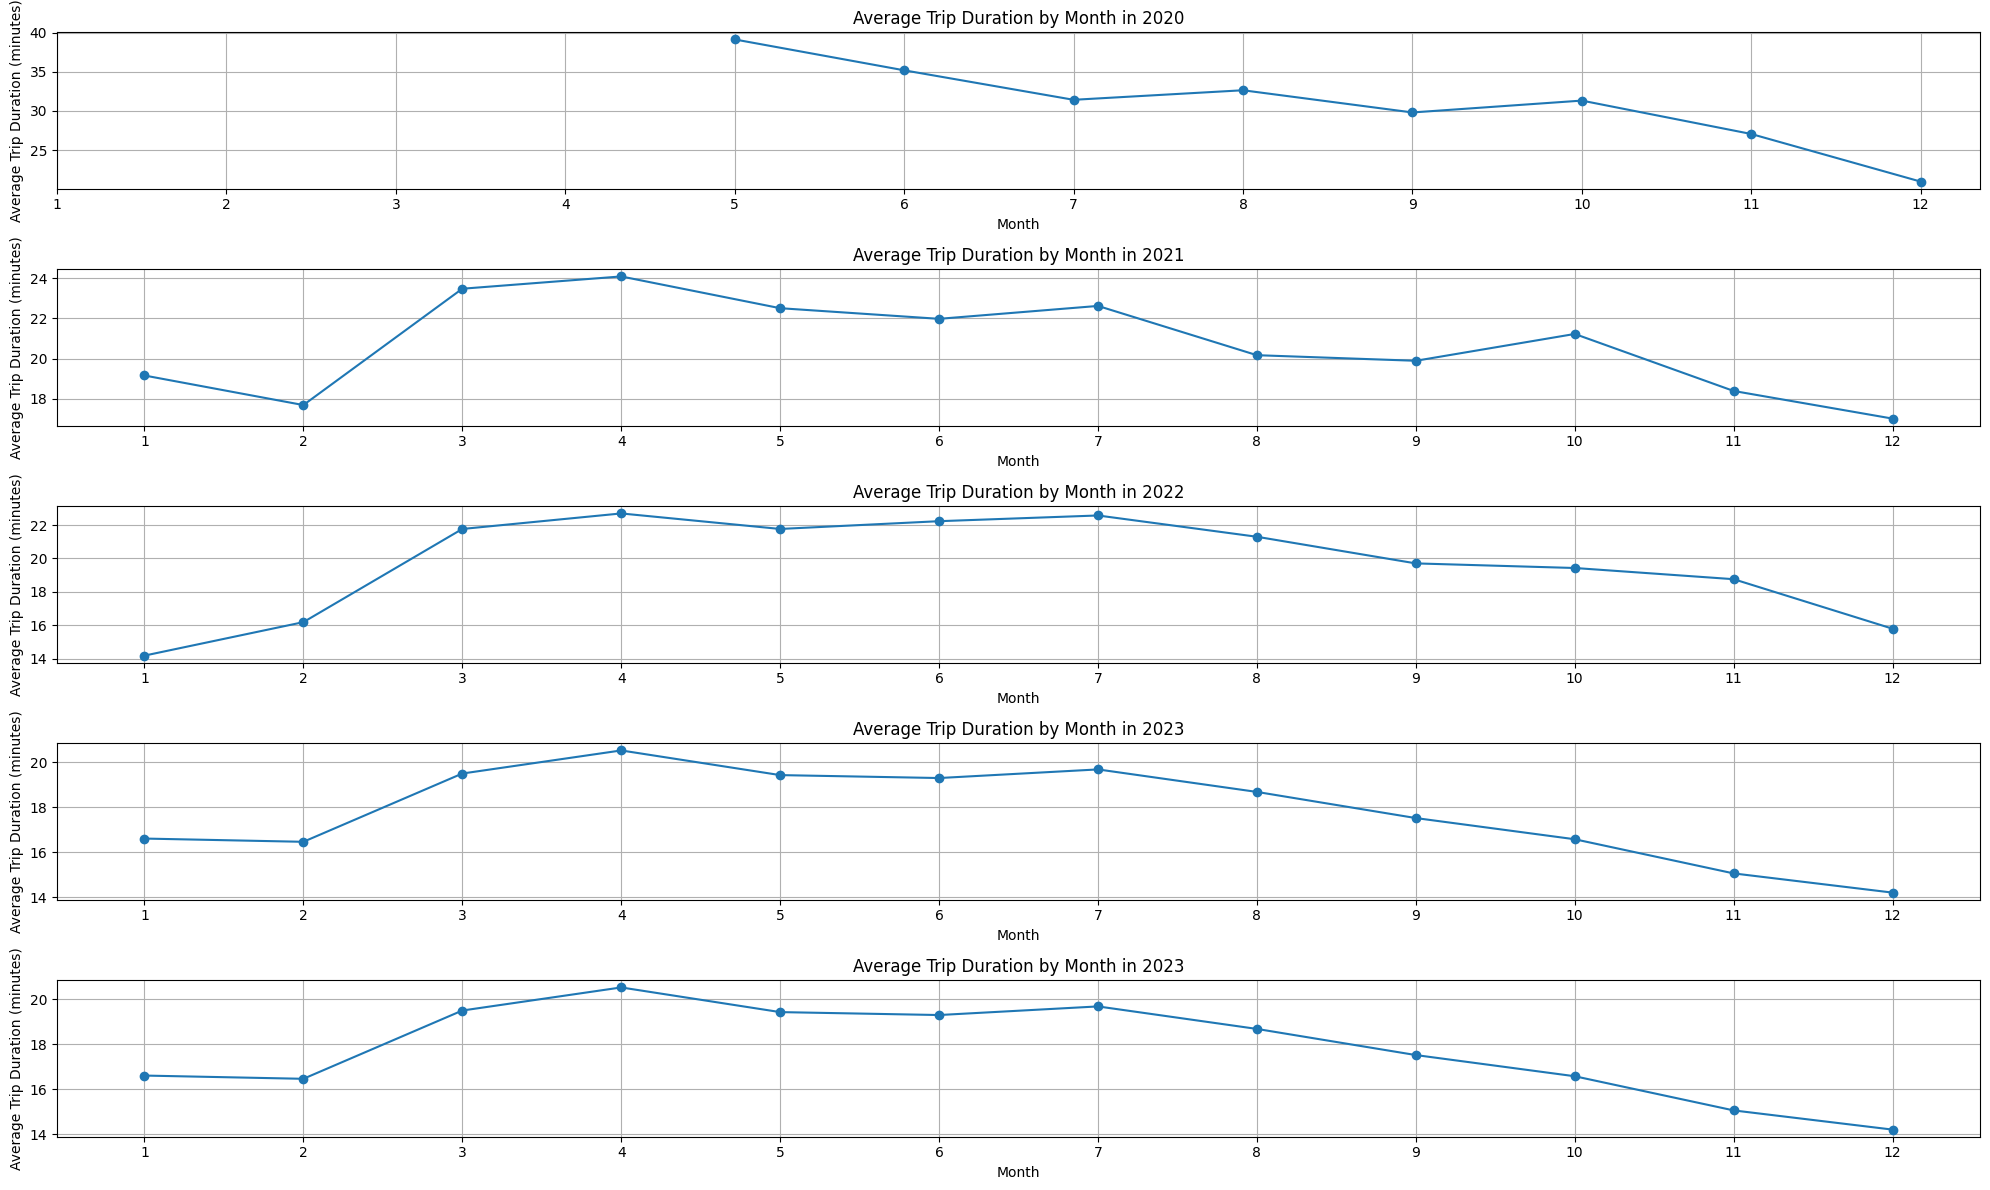

In [8]:
def plot_average_trip_length(df, year):
    #Plots average trip duration by month in a given year
    #Input: df - the dataframe to analyze
    #Input: The year to analyze
    #Output: a graph showing average trip length for each month in a year
    #Filter for the specified year
    df_year = df[df['Year'] == year]

    #Calculate average trip length per month
    monthly_avg_duration = df_year.groupby('Month')['Ride Length_min'].mean()

    #Graph results
    plt.plot(monthly_avg_duration.index, monthly_avg_duration.values, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Average Trip Duration (minutes)')
    plt.title(f'Average Trip Duration by Month in {year}')
    plt.xticks(range(1, 13))
    plt.grid(True)

#Create a 5 * 1 figure to hold smaller plots
plt.figure(figsize=(20, 12))

#Plot for 2020
plt.subplot(5, 1, 1)
plot_average_trip_length(df, 2020)

#Plot for 2021
plt.subplot(5, 1, 2)
plot_average_trip_length(df, 2021)

#Plot for 2022
plt.subplot(5, 1, 3)
plot_average_trip_length(df, 2022)

#Plot for 2023
plt.subplot(5, 1, 4)
plot_average_trip_length(df, 2023)

#Plot for 2024
plt.subplot(5, 1, 5)
plot_average_trip_length(df, 2023)

plt.tight_layout()
plt.show()

Average trip length seems to consistently peak in April

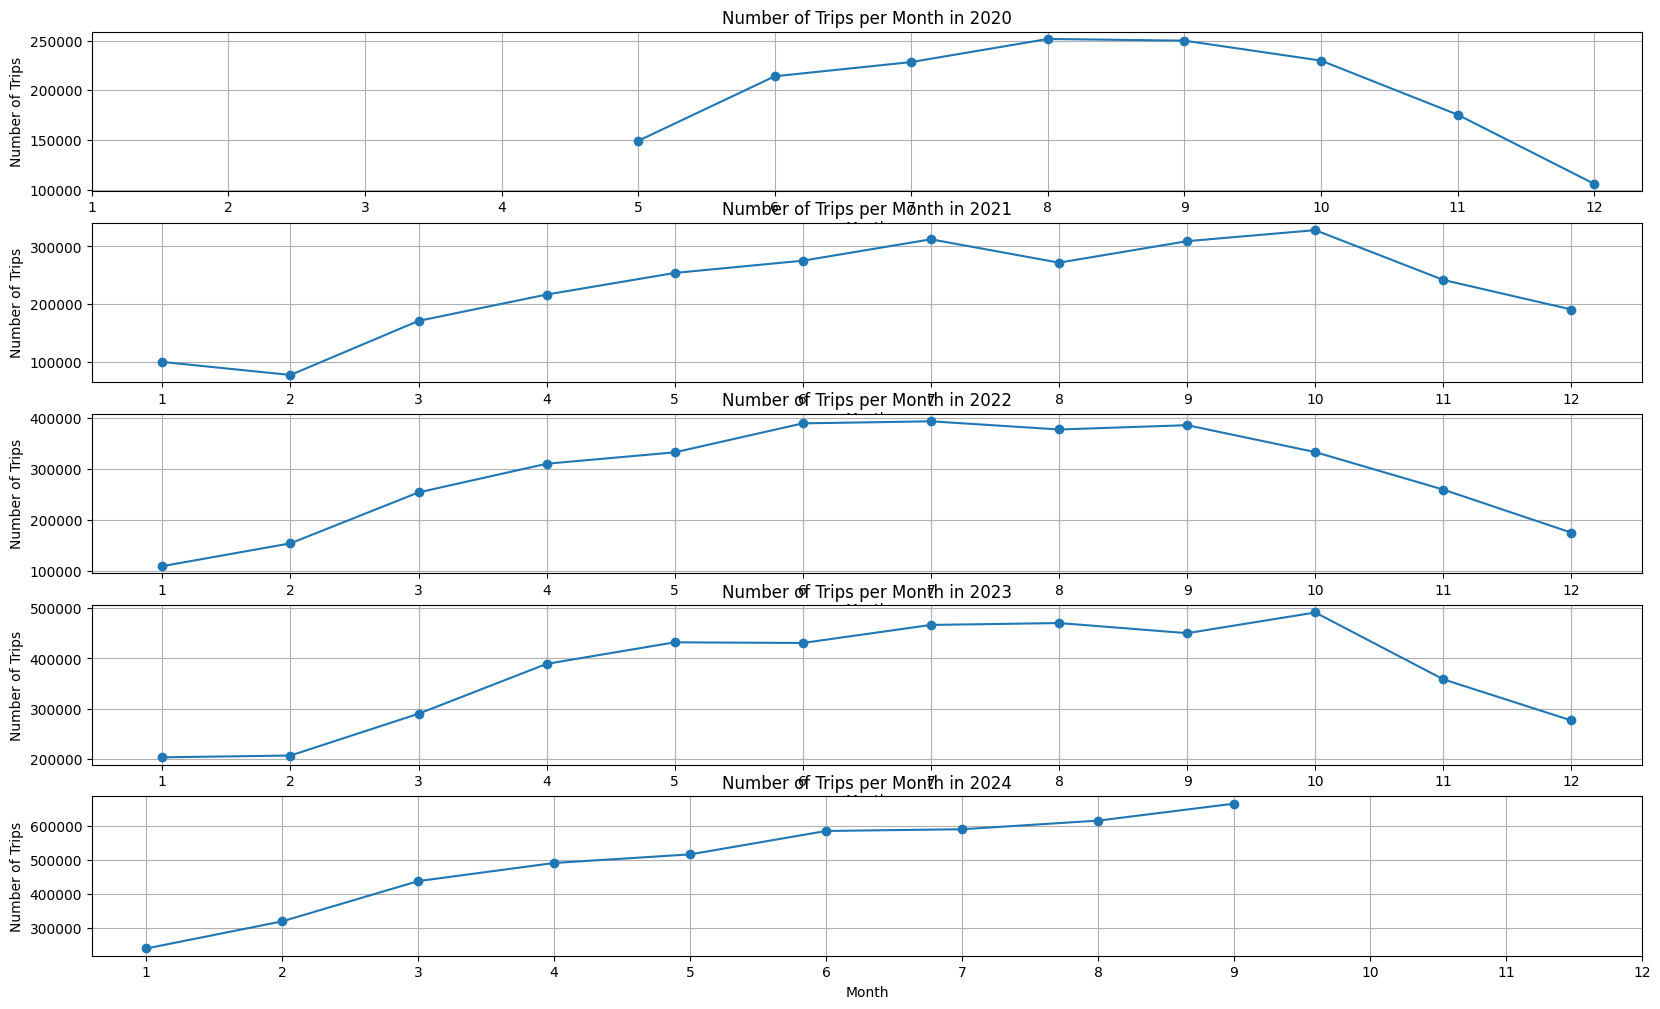

In [17]:
def plot_monthly_trips(df, year):
    #Plots number of trips taken each month in a given year
    #Input: df - dataframe to analyze
    #Input: year - year to analyze
    #Output: A graph with number of monthly trips in given year

    #Filter by given year
    df_year = df[df['Year'] == year]
    
    #Get month
    df_year.loc[:, 'Month'] = df_year['started_at'].dt.month
    #df_year['month'] = df_year['started_at'].dt.month
    
    
    #Count trips
    monthly_trips = df_year.groupby('Month').size()
    
    #Graph results
    plt.plot(monthly_trips.index, monthly_trips.values, marker='o')
    plt.xlabel('Month')
    plt.ylabel('Number of Trips')
    plt.title(f'Number of Trips per Month in {year}')
    plt.xticks(range(1, 13))
    plt.grid(True)

#Create a 5 * 1 figure to hold smaller grids
plt.figure(figsize=(20, 12))

#Plot for 2020
plt.subplot(5, 1, 1)
plot_monthly_trips(df, 2020)

#Plot for 2021
plt.subplot(5, 1, 2)
plot_monthly_trips(df, 2021)

#Plot for 2022
plt.subplot(5, 1, 3)
plot_monthly_trips(df, 2022)

#Plot for 2023
plt.subplot(5, 1, 4)
plot_monthly_trips(df, 2023)

#Plot for 2023
plt.subplot(5, 1, 5)
plot_monthly_trips(df, 2024)

plt.show()

Observation: Ridership is consistently increasing year over year. There is a steady drop off in ridership during Winter, with a somewhat consistent peak around Summer time.

<h3>How does usage change throughout the system?</h3>

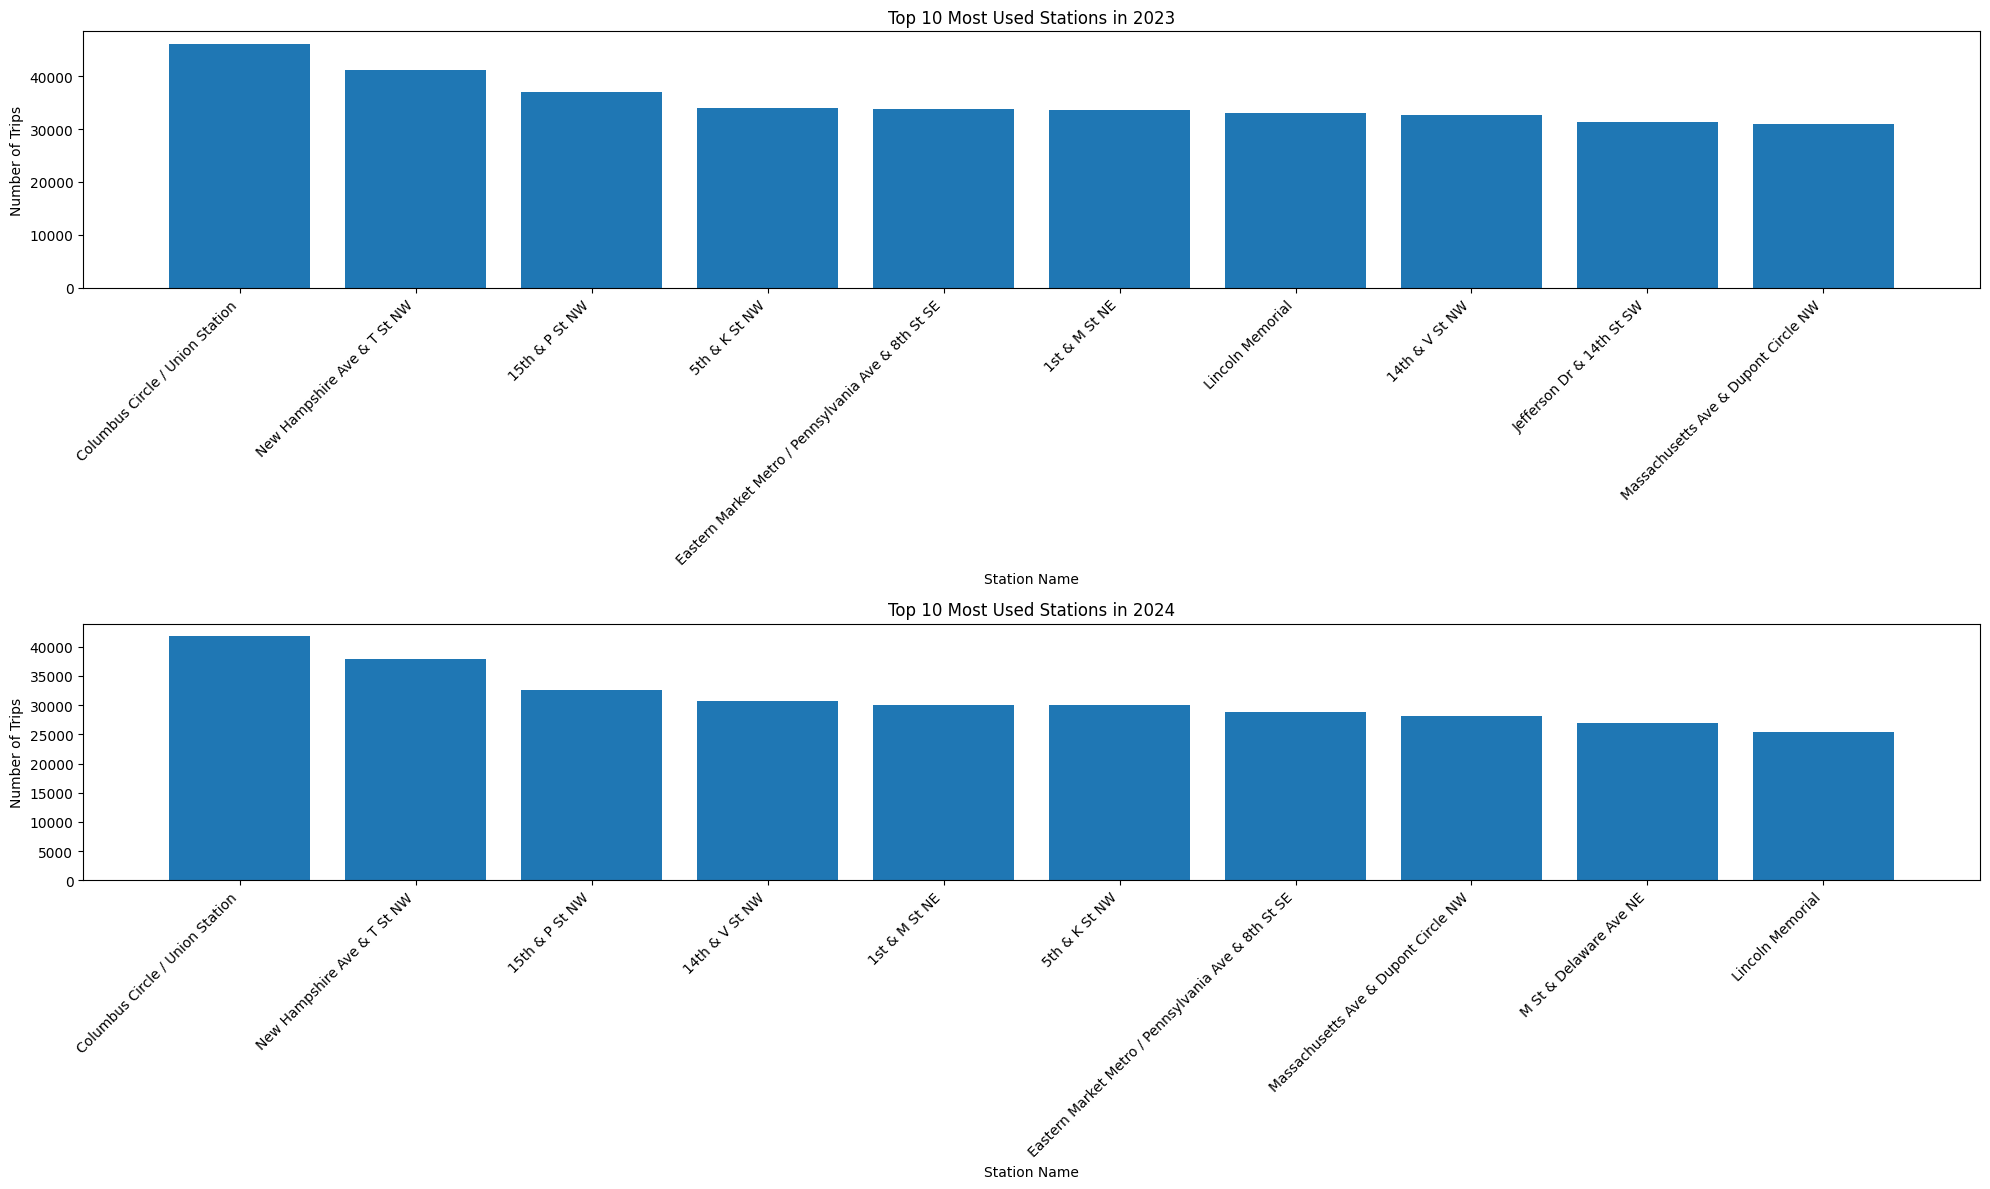

In [10]:
#OBSERVATION: All of the most used stations are in DC
#To preserve readability, I'm only using the most used stations for 2 years rather than 2020-2024
def plot_notable_stations(df, year, least_used = False):
    #Plots the most and least used stations in a given year
    #Input - df: dataframe to analyze
    #Input - year: year to analyze
    #Input - least_used: True if least used stations are desired. Default behavior is false and plots most
    #used stations.

    df_year = df[df['Year'] == year]

    #Count the frequency of each station
    #Note: Even though only start stations are being counted, it doens't really matter for overall findings. The top 10
    #most/least commonly used start stations are the same as the top 10 most/least commonly used end stations, with
    #the only difference being position inside the top 10
    station_counts = df_year['start_station_name'].value_counts()

    #Get the top 10 most or least used stations
    top_stations = (station_counts.head(10) if least_used is False else station_counts.tail(10))

    #Plot the results
    plt.bar(top_stations.index, top_stations.values)
    plt.xlabel('Station Name')
    plt.ylabel('Number of Trips')
    plt.title(f'Top 10 {("Most" if least_used is False else "Least")} Used Stations in {year}')
    plt.xticks(rotation=45, ha='right') #Needed for readability

#Create a 2 * 1 figure to hold smaller grids
plt.figure(figsize=(20, 12))

#Plot for 2023
plt.subplot(2, 1, 1)
plot_notable_stations(df, 2023)

#Plot for 2024
plt.subplot(2, 1, 2)
plot_notable_stations(df, 2024)


plt.tight_layout() #Needed for readability
plt.show()

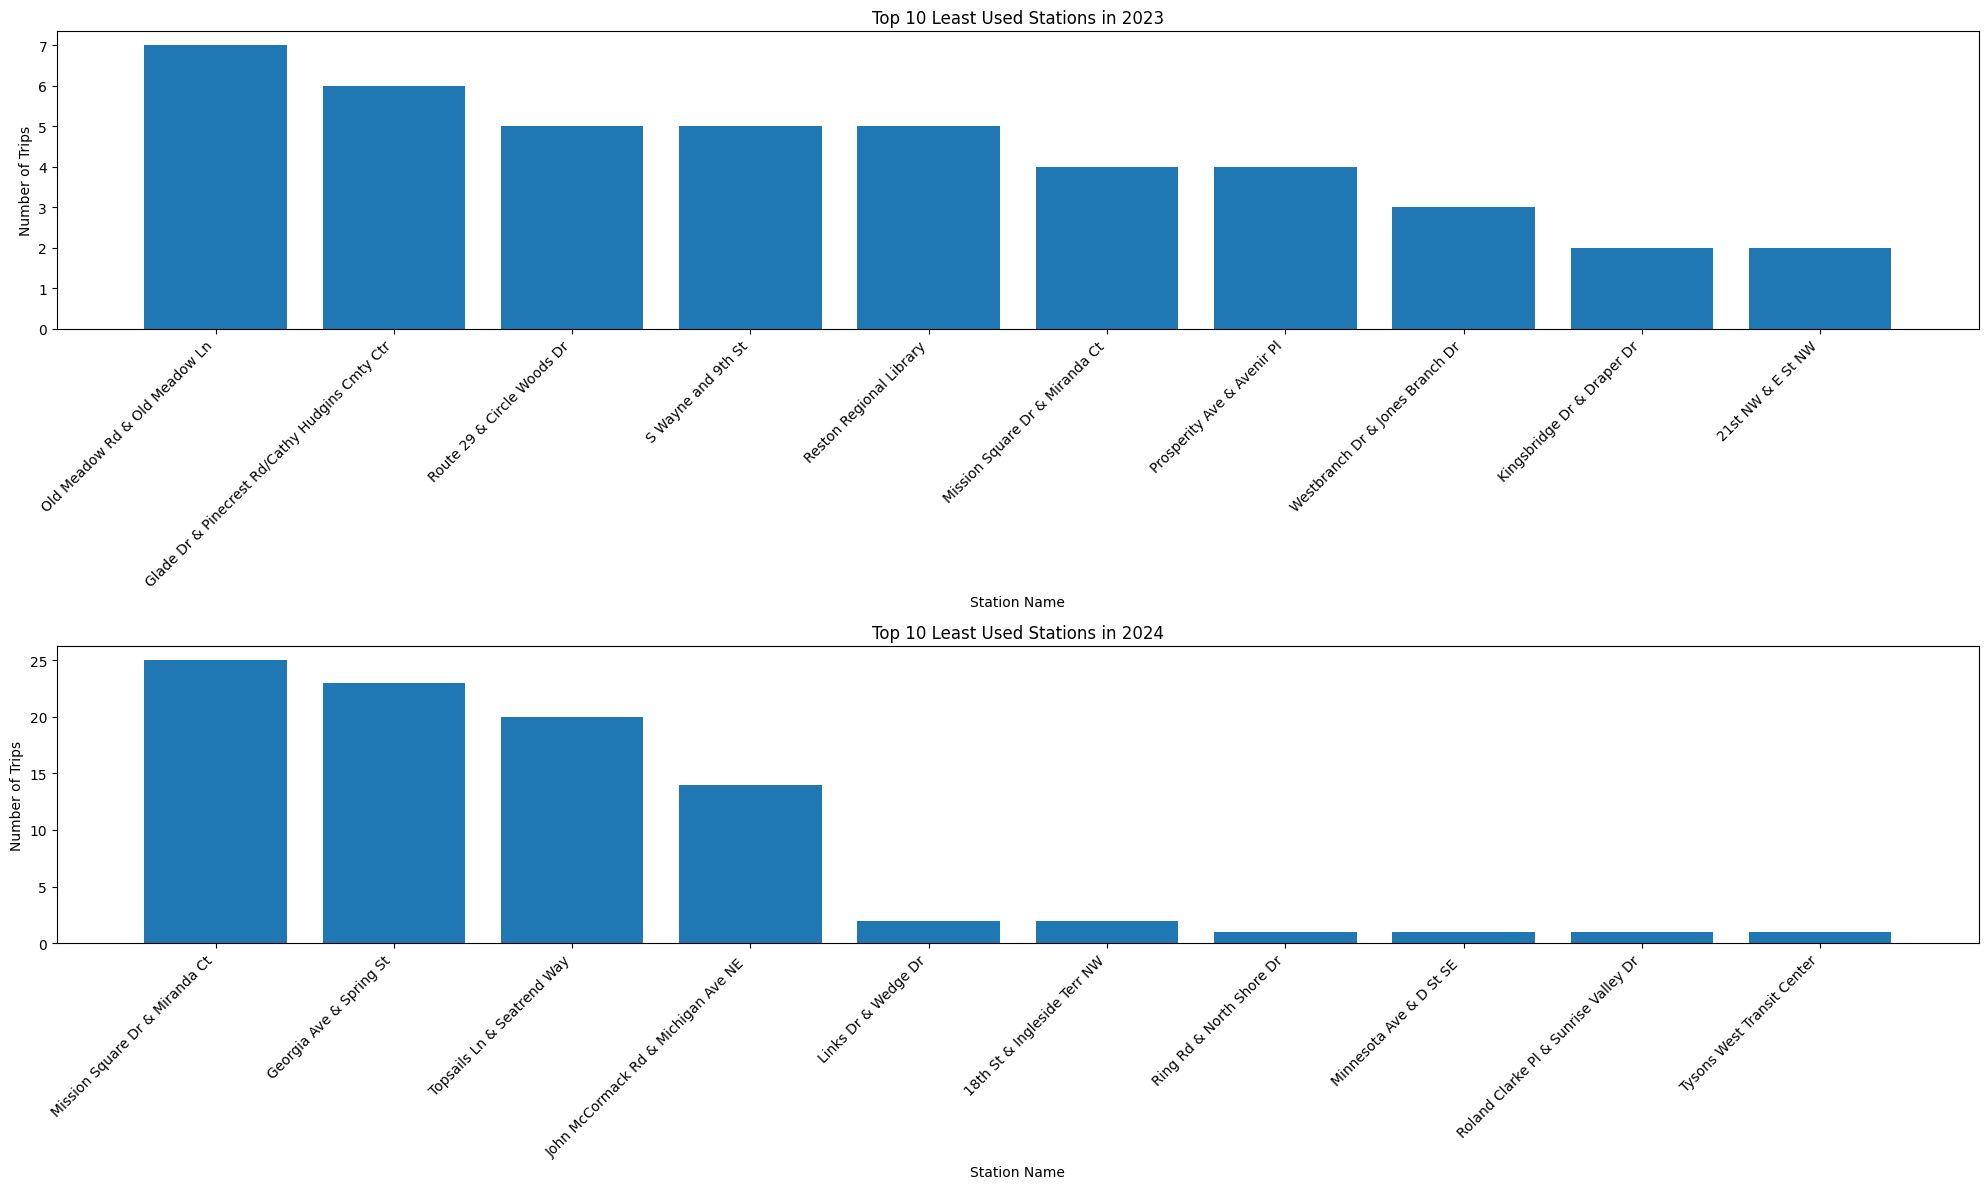

In [11]:
#Plot the least used stations of 2023 and 2024
#OBSERVATION: Many of these (if not all) are outside of DC

#Create a 2 * 1 figure to hold smaller grids
plt.figure(figsize=(20, 12))

#Plot for 2023
plt.subplot(2, 1, 1)
plot_notable_stations(df, 2023, True)

#Plot for 2024
plt.subplot(2, 1, 2)
plot_notable_stations(df, 2024, True)


plt.tight_layout()
plt.show()

<h1>THE NEXT FEW CELLS ARE STILL A WORK IN PROGRESS</h1>

In [12]:
#NOTE: There's a question somewhere asking what I would do if I had another month to work.
#I would incorporate the WalkScore API, but unfortunately I did not know that I had to request
#access until it was too late
########### Python 3.2 #############
"""import urllib.request, json

try:
    url = "https://api.wmata.com/Rail.svc/json/jStations"

    hdr ={
    # Request headers
    'Cache-Control': 'no-cache',
    'api_key': 'f4ec5f6332be467aa220d3075093b0e6',
    }

    req = urllib.request.Request(url, headers=hdr)

    req.get_method = lambda: 'GET'
    response = urllib.request.urlopen(req)
    print(response.getcode())
    print(response.read())
except Exception as e:
    print(e)"""
####################################
#Create dictionary of stations with long/lat

# BBC news api
# following query parameters are used
# source, sortBy and apiKey
apikey = "f4ec5f6332be467aa220d3075093b0e6" #Ricardo's WMATA API Key
query_params = {
    #"source": "bbc-news",
    #"sortBy": "top",
    "Cache-Control": 'no-cache',
    "api_key": apikey
}
main_url = " https://api.wmata.com/Rail.svc/json/jStations"

# fetching data in json format
res = requests.get(main_url, params=query_params)
print(res.json())

stations = res.json()["Stations"]
results = {

}

for ar in stations:
    latlong = [ar["Lat"], ar["Lon"]]
    results.update({ar["Name"] : latlong})

print(results)

#Now I have a dictionary with train stations and latlong, I want to print out each distance from a train station
#(Nongraph Question)
#Station Name - Within walking distance (0.25 miles) of train station? YES/NO. Consider eventually changing to or adding bus station

"""if __name__ == '__main__':

    # function call
    NewsFromBBC()"""

{'Stations': [{'Code': 'A01', 'Name': 'Metro Center', 'StationTogether1': 'C01', 'StationTogether2': '', 'LineCode1': 'RD', 'LineCode2': None, 'LineCode3': None, 'LineCode4': None, 'Lat': 38.898303, 'Lon': -77.028099, 'Address': {'Street': '607 13th St. NW', 'City': 'Washington', 'State': 'DC', 'Zip': '20005'}}, {'Code': 'A02', 'Name': 'Farragut North', 'StationTogether1': '', 'StationTogether2': '', 'LineCode1': 'RD', 'LineCode2': None, 'LineCode3': None, 'LineCode4': None, 'Lat': 38.903192, 'Lon': -77.039766, 'Address': {'Street': '1001 Connecticut Avenue NW', 'City': 'Washington', 'State': 'DC', 'Zip': '20036'}}, {'Code': 'A03', 'Name': 'Dupont Circle', 'StationTogether1': '', 'StationTogether2': '', 'LineCode1': 'RD', 'LineCode2': None, 'LineCode3': None, 'LineCode4': None, 'Lat': 38.909499, 'Lon': -77.04362, 'Address': {'Street': '1525 20th St. NW', 'City': 'Washington', 'State': 'DC', 'Zip': '20036'}}, {'Code': 'A04', 'Name': 'Woodley Park-Zoo/Adams Morgan', 'StationTogether1': '

"if __name__ == '__main__':\n\n    # function call\n    NewsFromBBC()"

In [13]:
#TODO: This cell needs to be rewritten. At the moment it can only gather latlong data for the most used
#stations of 2023. I want it to be able to gather the latlong data for any dataframe passed
#%pip install haversine

#Filter for 2023 data
df_2023 = df[df['Year'] == 2023]

#Count the frequency of each station (When rewriting, can I use the get_notable_stations for this?)
station_counts = df_2023['start_station_name'].value_counts()

#Get the top 10 most used stations
top_stations = station_counts.head(10).index

#Create a dictionary to store station information
station_info = {

}

# Iterate over the top stations
for station in top_stations:
    # Filter the DataFrame for the current station
    station_data = df_2023[df_2023['start_station_name'] == station]
    
    # Get the first longitude and latitude values for the station
    # You might want to consider averaging or taking a random value if there are multiple entries
    station_info[station] = [station_data['start_lat'].iloc[0], station_data['start_lng'].iloc[0]]
#IM SO HAPPY TO HAVE FOUND HAVERSINE
#The simplest way to do this might be to have the most popular stops loop through and find the distance to each station
#If a distance = to or less than 0.25miles is found the loop can go to the next iteration
#Consider using https://developer.wmata.com/api-details#api=54763629281d83086473f231&operation=5476362a281d830c946a3d6d
#The above api lets me search nearby bus stops for a provided latlong
print(haversine(station_info['Columbus Circle / Union Station'], results['Metro Center'], unit="mi"))
#print(station_info)

1.2493237862310869


In [14]:
print(results['Metro Center'])

[38.898303, -77.028099]


In [15]:
#(PART B) Wordmap of station names to see if anything pops up frequently like SW, NW, NE, SE, Ave, St, Hwy, Etc